In [2]:
import numpy as np
import pandas as pd

rng = np.random.default_rng(1)
x = rng.normal(size=100, scale=1, loc=0)
eps = rng.normal(size=100, scale=0.25, loc=0)

y = -1 + 0.5*x + eps

df = pd.DataFrame({
    "x": x,
    "y": y
})

len(y)

100

y is of length 100 with $\beta_0 = -1$ and $\beta_1 = 0.5$

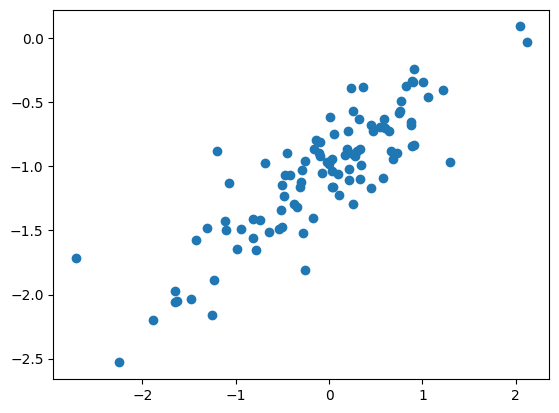

In [3]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.scatter(x, y);

In [4]:
import statsmodels.api as sm
from ISLP.models import ModelSpec as MS

X = MS(["x"]).fit_transform(df)

results = sm.OLS(y, X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     280.0
Date:                Thu, 24 Jul 2025   Prob (F-statistic):           1.74e-30
Time:                        12:31:18   Log-Likelihood:                -2.4306
No. Observations:                 100   AIC:                             8.861
Df Residuals:                      98   BIC:                             14.07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.0190      0.025    -40.537      0.000      -1.069      -0.969
x              0.4921      0.029     16.734      0.000       0.434       0.551
==============================================================================
Omnibus:                        1.277   Durbin-Watson:                   2.198
Prob(Omnibus):                  0.528   Jarque-Bera (JB):                0.759
Skew:                           0.114   Prob(JB):                        0.684
Kurtosis:                       3.361   Cond. No.                         1.20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

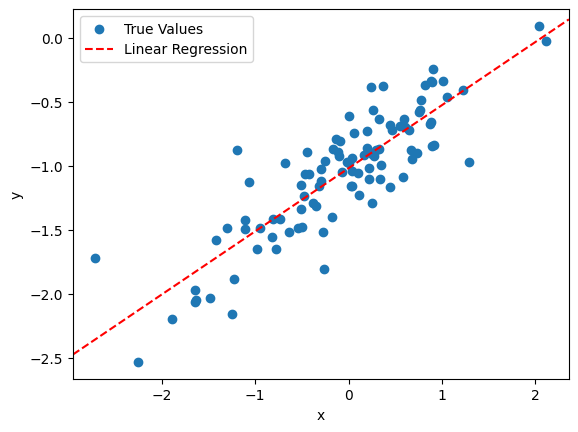

In [5]:
fig, ax = plt.subplots();

ax.scatter(x, y, label="True Values");
ax.axline(xy1=(0, results.params.iloc[0]), slope=results.params.iloc[1], c='r', ls='--', label="Linear Regression");

ax.set_xlabel("x");
ax.set_ylabel("y");

ax.legend();

The linear regression model produces coefficient estimates that are very close to the true values, and their confidence intervals successfully contain the true coefficients.

In [6]:
from ISLP.models import poly

X = MS([poly("x", degree=2)]).fit_transform(df)

results = sm.OLS(y, X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     138.6
Date:                Thu, 24 Jul 2025   Prob (F-statistic):           3.66e-29
Time:                        12:31:18   Log-Likelihood:                -2.4293
No. Observations:                 100   AIC:                             10.86
Df Residuals:                      97   BIC:                             18.67
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
intercept               -1.0552      0.025    -41.920      0.000      -1.105      -1.005
poly(x, degree=2)[0]     4.1909      0.252     16.649      0.000       3.691       4.691
poly(x, degree=2)[1]    -0.0131      0.252     -0.052      0.959      -0.513       0.487
==============================================================================
Omnibus:                        1.338   Durbin-Watson:                   2.197
Prob(Omnibus):                  0.512   Jarque-Bera (JB):                0.814
Skew:                           0.119   Prob(JB):                        0.666
Kurtosis:                       3.372   Cond. No.                         10.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

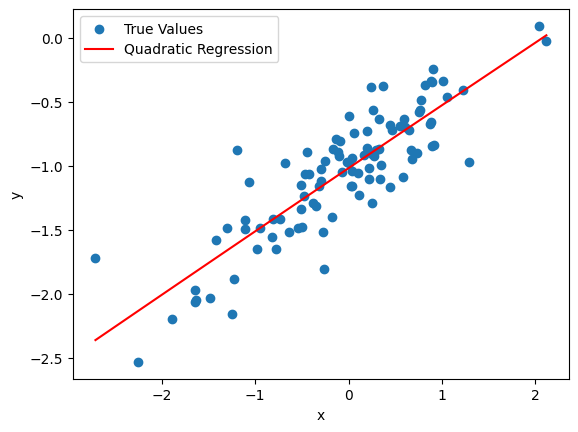

In [7]:
fig, ax = plt.subplots()
ax.scatter(x, y, label="True Values")
y_pred = results.predict(X)
sort_idx = np.argsort(x)
ax.plot(x[sort_idx], y_pred[sort_idx], color='red', label='Quadratic Regression')
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend();

There is no evidence that the quadratic term improves the model fit, which is expected. The coefficient for $x^2$ is close to zero, with a very high p-value of 0.959, indicating insignificance. Additionally, the R-squared value remains unchanged, showing no improvement in explanatory power. The plotted regression line appears nearly linear, with no visual indication of a second-degree (quadratic) relationship.

In [8]:
rng = np.random.default_rng(1)
x = rng.normal(size=100, scale=1, loc=0)
eps = rng.normal(size=100, scale=0.1, loc=0)

y = -1 + 0.5*x + eps

df = pd.DataFrame({
    "x": x,
    "y": y
})

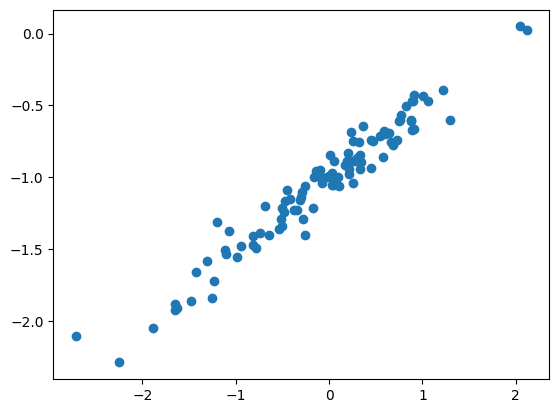

In [9]:
fig, ax = plt.subplots()

ax.scatter(x, y);

In [10]:
X = MS(["x"]).fit_transform(df)

results = sm.OLS(y, X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     1784.
Date:                Thu, 24 Jul 2025   Prob (F-statistic):           1.08e-64
Time:                        12:31:18   Log-Likelihood:                 89.198
No. Observations:                 100   AIC:                            -174.4
Df Residuals:                      98   BIC:                            -169.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.0076      0.010   -100.209      0.000      -1.028      -0.988
x              0.4969      0.012     42.236      0.000       0.474       0.520
==============================================================================
Omnibus:                        1.277   Durbin-Watson:                   2.198
Prob(Omnibus):                  0.528   Jarque-Bera (JB):                0.759
Skew:                           0.114   Prob(JB):                        0.684
Kurtosis:                       3.361   Cond. No.                         1.20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

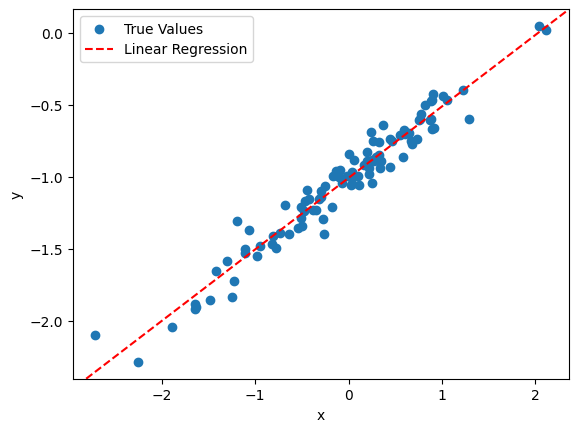

In [11]:
fig, ax = plt.subplots();

ax.scatter(x, y, label="True Values");
ax.axline(xy1=(0, results.params.iloc[0]), slope=results.params.iloc[1], c='r', ls='--', label="Linear Regression");

ax.set_xlabel("x");
ax.set_ylabel("y");

ax.legend();

Reducing the noise resulted in tighter confidence intervals for the linear model coefficients, indicating greater precision and confidence in the estimates. This suggests that with less variability in the data, the model can estimate the coefficients more reliably.

In [12]:
rng = np.random.default_rng(1)
x = rng.normal(size=100, scale=1, loc=0)
eps = rng.normal(size=100, scale=1, loc=0)

y = -1 + 0.5*x + eps

df = pd.DataFrame({
    "x": x,
    "y": y
})

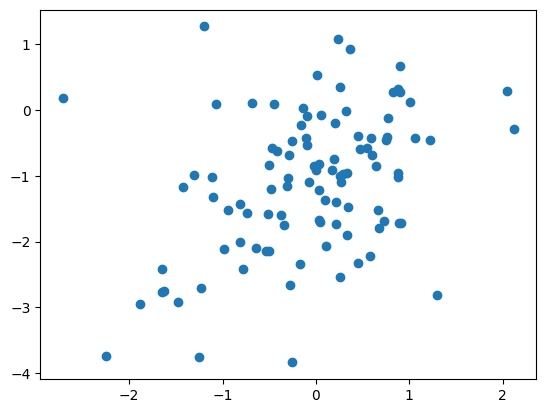

In [13]:
fig, ax = plt.subplots()

ax.scatter(x, y);

In [14]:
X = MS(["x"]).fit_transform(df)

results = sm.OLS(y, X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.139
Model:                            OLS   Adj. R-squared:                  0.131
Method:                 Least Squares   F-statistic:                     15.87
Date:                Thu, 24 Jul 2025   Prob (F-statistic):           0.000131
Time:                        12:31:18   Log-Likelihood:                -141.06
No. Observations:                 100   AIC:                             286.1
Df Residuals:                      98   BIC:                             291.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.0760      0.101    -10.701      0.000      -1.276      -0.876
x              0.4686      0.118      3.983      0.000       0.235       0.702
==============================================================================
Omnibus:                        1.277   Durbin-Watson:                   2.198
Prob(Omnibus):                  0.528   Jarque-Bera (JB):                0.759
Skew:                           0.114   Prob(JB):                        0.684
Kurtosis:                       3.361   Cond. No.                         1.20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

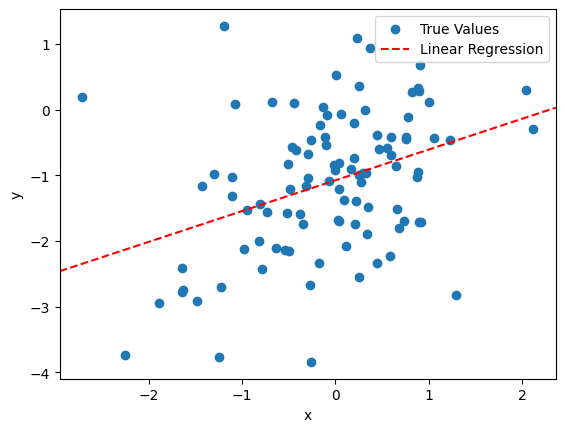

In [15]:
fig, ax = plt.subplots();

ax.scatter(x, y, label="True Values");
ax.axline(xy1=(0, results.params.iloc[0]), slope=results.params.iloc[1], c='r', ls='--', label="Linear Regression");

ax.set_xlabel("x");
ax.set_ylabel("y");

ax.legend();

Adding extra noise to the data reduced the confidence in our model’s estimates, as reflected by the wider confidence intervals. However, the model still correctly captured the true coefficients. That said, in a real-world scenario where the true function is unknown, we might be inclined to question or even discard such results, especially in sensitive applications, since a standard error of 0.1 can be considered large when the coefficient itself is small, such as 0.5 in this case.